## Sustentación

Para el problema se hara uso del algoritmo de Kruskal por los siguientes motivos:
- Se nos pide hallar el costo minimo para la construccion de caminos. Caminos que estan disconjuntos y tenemos que unirlos.
- Para resolver eso, tendriamos que usar un arbol de expansion minima. El algoritmo de Kruskal permite eso.

## Codigo

In [ ]:
num_sitios = 7

# El sitio A sera el nodo 0 y el sitio G sera el valor 6
matriz_conexiones = {
    (0, 1): 4, (0,2): 7, (1, 2): 5, (1,3): 9,
    (2, 3): 6, (2, 4): 3, (3, 4): 1, (4, 5): 2,
    (5, 6): 8, (4, 6): 6
}

In [ ]:
def find(parent, i):
    if parent[i] == i:
        return i
    return find(parent, parent[i])

def union(parent, rank, x, y):
    root_x = find(parent, x)
    root_y = find(parent, y)
    if root_x != root_y:
        if rank[root_x] < rank[root_y]:
            parent[root_x] = root_y
        elif rank[root_x] > rank[root_y]:
            parent[root_y] = root_x
        else:
            parent[root_y] = root_x
            rank[root_x] += 1
        return True

    return False

In [ ]:
def kruskal(num_sitios, matriz_conexiones):
    nodos = []
    for (u, v), peso in matriz_conexiones.items():
        nodos.append((peso, u, v))

    # ordenar por peso
    nodos.sort()

    parent = list(range(num_sitios))
    rank = [0] * num_sitios
    mst = []
    costo_total = 0

    for peso, u, v in nodos:
        if union(parent, rank, u, v):
            mst.append((u, v, peso))
            costo_total += peso

    return mst, costo_total

In [ ]:
mst_conexiones, costo_total_mst = kruskal(num_sitios, matriz_conexiones)

print("Conexiones del MST:")
for u, v, weight in mst_conexiones:
    print(f"Sitio {u} - Sitio {v}: Costo {weight}")

print(f"\nCosto total del MST: {costo_total_mst}")

Conexiones del MST:
Sitio 3 - Sitio 4: Costo 1
Sitio 4 - Sitio 5: Costo 2
Sitio 2 - Sitio 4: Costo 3
Sitio 0 - Sitio 1: Costo 4
Sitio 1 - Sitio 2: Costo 5
Sitio 4 - Sitio 6: Costo 6

Costo total del MST: 21


## Dibujo del Grafo
Aqui se hizo uso de la IA Gemini

In [ ]:
!pip install networkx matplotlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for (u, v), peso in matriz_conexiones.items():
    G.add_edge(u, v, weight=peso)

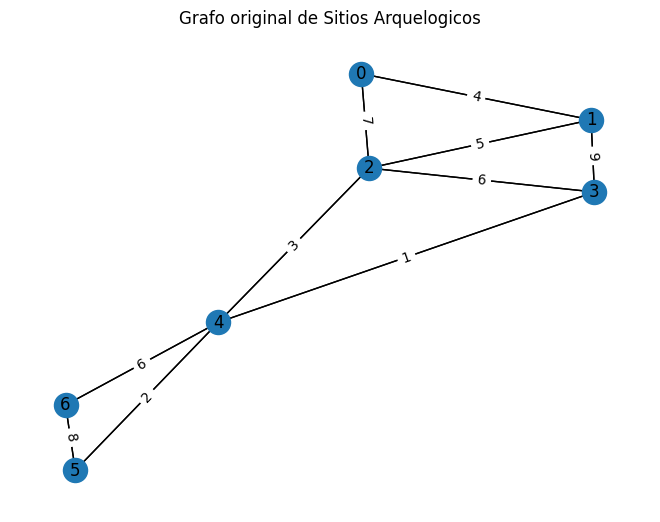

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edges(G, pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo original de Sitios Arquelogicos")
plt.show()

LOS CAMINOS EN ROJO SON LOS DE EXPANSION MINIMA (KRUSKAL)


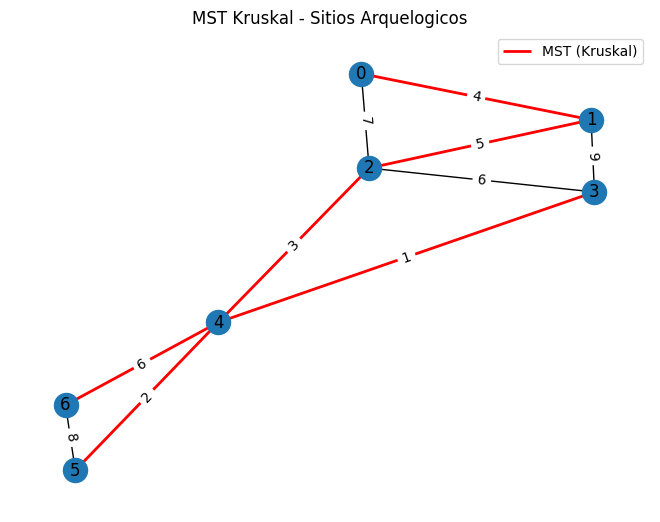

In [ ]:
print("LOS CAMINOS EN ROJO SON LOS DE EXPANSION MINIMA (KRUSKAL)")

plt.figure()
nx.draw(G, pos, with_labels=True)
mst_edges = [(u, v) for u, v, peso in mst_conexiones]
nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='red', width=2, label='MST (Kruskal)')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("MST Kruskal - Sitios Arquelogicos")
plt.legend()
plt.show()